# Deep Learning com Keras

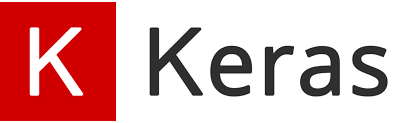




[Keras](https://keras.io/) é uma poderosa biblioteca escrita em python que possibilita, de uma maneira simples, implementar aplicações de deep learning.

É possível resolver problemas como classificação e regressão, mas também resolver problemas complexos como detecção de objetos em imagens, segmentação semântica e reconhecimento de voz.

## Por onde devo começar?

Antes de qualquer coisa, é necessário entender o problema a ser resolvido. Isso é válido para qualquer aplicação de aprendizado de máquina.

Em seguida, é importante fazer o pré-processamento dos seus dados, colocando no formato correto para utilização no seu modelo.

Finalmente, cria-se um modelo e aplica o treinamento. 

Para criar o modelo, é interessante estudar [como funcionam as redes neurais](https://medium.com/neuronio-br/entendendo-redes-convolucionais-cnns-d10359f21184).

## Passos para criar e usar uma rede neural convolucional no Keras

1. Primeiramente, deve-se criar um modelo. Nessa etapa define-se como será a nede neural, quantas camadas ela deve possuir, qual a relação entre as camadas, como deve ser a camada de entrada e a camada de saída. Existem vários tipos de camadas e também vários parâmetros que devem ser especificados em cada uma.

2. Compila-se o modelo.

3. Com os dados de treinamento, treina-se o modelo usando o método 'fit'.

4. Com o modelo treinado, para fazer predições de novos dados, usa-se o método 'predict'.

## Resolvendo a base MNIST usando o Keras

Para reproduzir o código de exemplo abaixo é necessária a instalação das seguintes bibliotecas:

```
pip install python-mnist
pip install tensorflow==2.2.0-rc2
pip install numpy
```


Para exemplificar uma aplicação simples de nede neural convolucional, vamos usar a base MNIST.
Ela pode ser baixada [aqui](http://yann.lecun.com/exdb/mnist/) e possui 4 arquivos (train-images-idx3-ubyte, train-labels-idx1-ubyte, t10k-images-idx3-ubyte, t10k-labels-idx1-ubyte) que devem estar no mesmo diretório que esse código. 

Essa base é formada por imagens de dimensões 28x28 pixels, em que cada imagem é um número de 0 a 9. 

![alt text](https://i.stack.imgur.com/GKx1A.png)

O objetivo dessa base é reconhecer o número que se encontra em cada imagem, logo, é um problema de classificação.


In [0]:
# Carregando os dados de teste
from mnist import MNIST

mndata = MNIST('.') # Carrega os dados que estão no mesmo diretório

training_images, training_labels = mndata.load_training()
test_images, test_labels = mndata.load_testing()

In [0]:
# Pré-processamento 
from tensorflow.keras.utils import to_categorical
import numpy as np

# As imagens serão colocadas em um vetor de matrizes tridimencionais (largura, altura, canais)
# As labels serão transformadas em vetor de tamanho 10 em que a posição com o número 1 equivale a label da imagem.
training_images = np.array(training_images).reshape(60000,28,28,1)
training_labels = to_categorical(np.array(training_labels))
test_images = np.array(test_images).reshape(10000,28,28,1)
test_labels = to_categorical(np.array(test_labels))



Usando o keras é simples criar um [modelo](https://keras.io/models/about-keras-models/), adicionar e configurar as camadas desse modelo.

Após instanciar o seu modelo, usando a função add é possível montar a sua rede com os tipos de camada já implementados pela biblioteca keras.

Aqui criamos uma rede com duas camadas convolucionais, uma camada que achata a anterior em um grande vetor e uma última camada para adequar a saída ao vetor desejado.

In [0]:
# Criando um modelo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D

# Instacia um modelo sequencial
model = Sequential()

# Adiciona uma camada convolucional 
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)))
# Adiciona outra camada convolucional
model.add(Conv2D(16, kernel_size=3, activation='relu'))
# Adiciona uma camada flatten
model.add(Flatten())
# Adiciona uma camada dense
model.add(Dense(10, activation='softmax'))

# Compila o modelo usando o otimizador 'adam'
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumo do modelo
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 16)        4624      
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                92170     
Total params: 97,114
Trainable params: 97,114
Non-trainable params: 0
_________________________________________________________________


Para treinar o modelo, também passamos um conjunto de dados para validação. Para isso, dividiu-se os dados em 50000 amostras de treinamento e 10000 amostras de validação. A quantidade de épocas define quantas rodadas de treinamento o seu modelo deve realizar,

In [0]:
# Fazendo o treinamento
validation_data = (training_images[50000:], training_labels[50000:])
model.fit(training_images[:50000], training_labels[:50000], validation_data=validation_data, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 67s 43ms/step - loss: 0.2672 - accuracy: 0.9413 - val_loss: 0.0966 - val_accuracy: 0.9737
Epoch 2/5
1563/1563 [==============================] - 68s 43ms/step - loss: 0.0791 - accuracy: 0.9762 - val_loss: 0.1075 - val_accuracy: 0.9727
Epoch 3/5
1563/1563 [==============================] - 68s 44ms/step - loss: 0.0538 - accuracy: 0.9836 - val_loss: 0.1154 - val_accuracy: 0.9706
Epoch 4/5
1563/1563 [==============================] - 68s 43ms/step - loss: 0.0418 - accuracy: 0.9870 - val_loss: 0.1098 - val_accuracy: 0.9784
Epoch 5/5
1563/1563 [==============================] - 68s 44ms/step - loss: 0.0331 - accuracy: 0.9898 - val_loss: 0.1081 - val_accuracy: 0.9769


In [0]:
# Fazendo predições
prediction = model.predict(test_images)

In [0]:
# Avaliando o método
from tensorflow import metrics
hits = metrics.categorical_accuracy(test_labels, prediction)

accuracy = sum(hits)/len(test_images)

print("Acurácia: "+str(np.array(accuracy)*100)+"%")

Acurácia: 97.17000126838684%


## Referências

* [Base MNIST](http://yann.lecun.com/exdb/mnist/)
* [Building a Convolutional Neural Network (CNN) in Keras](https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5)
* [Keras Documentation](https://keras.io/)